# Exploring Weather Trends - Project Instructions


## Summary
In this project, you will analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

## Goal

My goal will be to create a visualization and prepare a write up describing the similarities and differences between global temperature trends and temperature trends in the closest big city to where I live. 
    
----
----

# Project workflow

## Extract the data from the database

I will extract necessary data from database. I will export the temperature data for the world as well as for the closest big city to where I live and that is Dhaka, capital of Bangladesh. I have written SQL query for that.

Firstly, to get the nearest city near me, I checked for all the cities for my country using this command:

`SELECT * from city_list WHERE country = 'Bangladesh'`

- **the city level data:** I collected the data for City Dhaka using the following command

`SELECT * from city_data WHERE city = 'Dhaka'`

and saved it as a csv with name **city_Data.csv**


- **the global data:** for the global data I ran the command

 `SELECT * from global_data` 

and saved it as csv with name **global_Data.csv**

## Open up the CSV

To open up the CSV file, I have used panda library and used matplotlib for plotting.  


In [1]:
import warnings 
warnings.filterwarnings('ignore') 

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
city_data = pd.read_csv("city_data.csv")
global_data = pd.read_csv("global_data.csv")
city_list = pd.read_csv("city_list.csv")

In [3]:
city_data.info()
city_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      218 non-null    int64  
 1   city      218 non-null    object 
 2   country   218 non-null    object 
 3   avg_temp  213 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ KB


,year,city,country,avg_temp
0,1796,Dhaka,Bangladesh,25.35
1,1797,Dhaka,Bangladesh,26.36
2,1798,Dhaka,Bangladesh,25.22
3,1799,Dhaka,Bangladesh,25.61
4,1800,Dhaka,Bangladesh,25.54


In [4]:
global_data.info()
global_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [5]:
#select the cities from Bangladesh out of the city_list dataframe
city_list[city_list["country"] == "Bangladesh"]

,city,country
88,Dhaka,Bangladesh
152,Khulna,Bangladesh


In [6]:
#create a new reference to the city_data dataframe for the city "Dhaka"
df_dhaka = city_data[city_data["city"] == "Dhaka"]
df_dhaka.head()

,year,city,country,avg_temp
0,1796,Dhaka,Bangladesh,25.35
1,1797,Dhaka,Bangladesh,26.36
2,1798,Dhaka,Bangladesh,25.22
3,1799,Dhaka,Bangladesh,25.61
4,1800,Dhaka,Bangladesh,25.54


In [7]:
#create a new reference to the city_data dataframe for the city "Khulna"
df_khulna = city_data[city_data["city"] == "Khulna"]
df_khulna.head()

,year,city,country,avg_temp


Here I can see, for Khulna there is no data available. So I will work with Dhaka's data only.

In [8]:
print('The sum of the missing value in the Dhaka dataframe in the column "avg_temp" is', sum(df_dhaka["avg_temp"].isna()))

#show missing values in the Dhaka
df_dhaka[df_dhaka["avg_temp"].isna()]

The sum of the missing value in the Dhaka dataframe in the column "avg_temp" is 5


,year,city,country,avg_temp
12,1808,Dhaka,Bangladesh,NaN
13,1809,Dhaka,Bangladesh,NaN
14,1810,Dhaka,Bangladesh,NaN
15,1811,Dhaka,Bangladesh,NaN
16,1812,Dhaka,Bangladesh,NaN


## Creating line chart

A **line chart** or line plot or line graph or curve chart is a type of chart which displays information as a series of data points called 'markers' connected by straight line segments.

Here I have to create a line chart that compares my city’s temperatures with the global temperatures. I have plotted the moving average rather than the yearly averages in order to smooth out the lines, making trends more observable.

In [9]:
# joining the two csvs data on year column
combine_data= global_data.merge(city_data, how='left', on= "year", 
                                suffixes=('_global', '_city')).drop(['city', 'country'], axis= 1)

In [10]:
combine_data.set_index('year', inplace= True)

In [11]:
combine_data.head()

,avg_temp_global,avg_temp_city
year,,
1750,8.72,NaN
1751,7.98,NaN
1752,5.78,NaN
1753,8.39,NaN
1754,8.47,NaN


## Exploring Trends

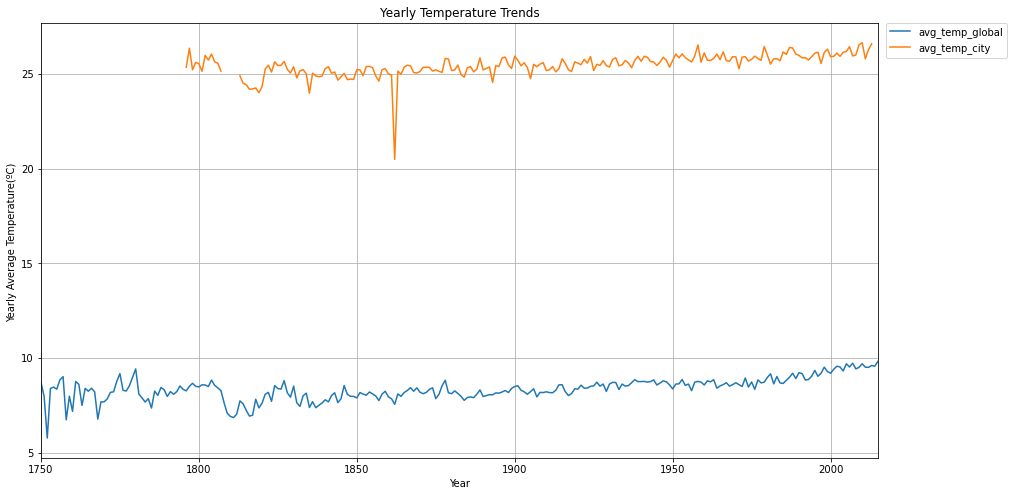

In [12]:
title='Yearly Temperature Trends'
ylabel='Yearly Average Temperature(ºC) '
xlabel='Year'

fig, ax = plt.subplots()
combine_data.plot(figsize=(15,8), ax=ax , title= title).autoscale(axis='x',tight=True)
ax.legend(["Global Average Temperatures", "Dhaka Average Temperatures"]);
ax.set(xlabel=xlabel, ylabel=ylabel);

plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.show()

## Moving Averages

**Moving averages** are used to smooth out data to make it easier to observe long term trends and not get lost in daily fluctuations. 

(For example, let's say you wanted to visualize the sales trend at a clothing retail store. You start with daily data, and your chart looks too volatile to interpret because more people shop on the weekends, so sales spike on those days.)

### Five Years Moving Average

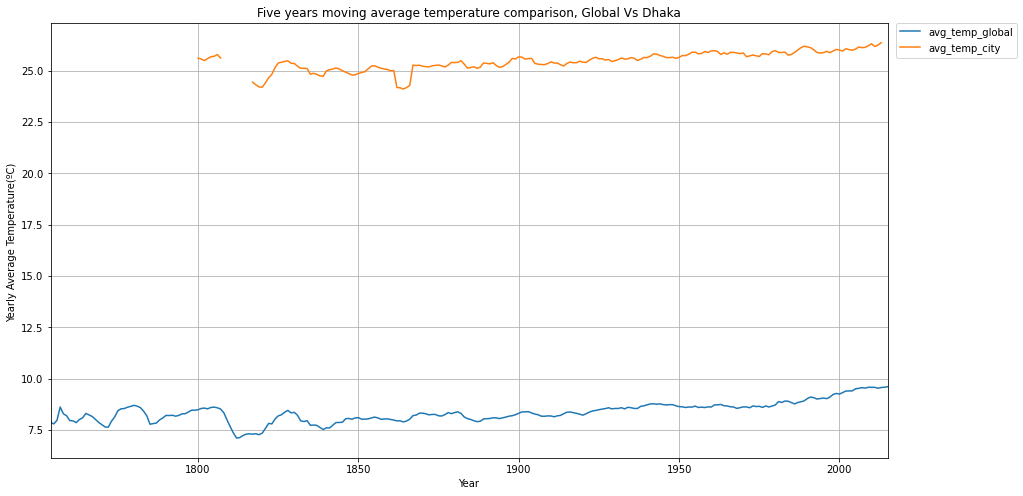

In [13]:
title='Five years moving average temperature comparison, Global Vs Dhaka'
ylabel='Yearly Average Temperature(ºC) '
xlabel='Year'

fig, ax = plt.subplots()
combine_data.rolling(window=5).mean().plot(figsize=(15,8), ax=ax , title= title).autoscale(axis='x',tight=True)
#combine_data.rolling(window=5).mean().plot(figsize=(15,8), ax=ax , title= title).autoscale(axis='x',tight=True)
ax.legend(["Global Average Temperatures", "City Average Temperatures"]);
ax.set(xlabel=xlabel, ylabel=ylabel);

plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.show()

### Ten Years Moving Average

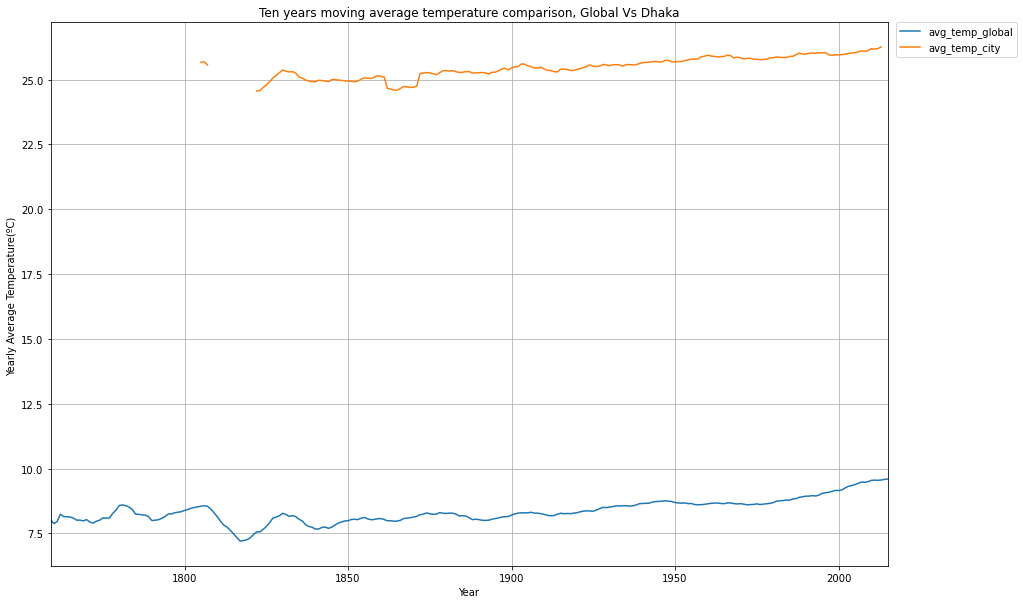

In [14]:
title='Ten years moving average temperature comparison, Global Vs Dhaka'
ylabel='Yearly Average Temperature(ºC) '
xlabel='Year'

fig, ax = plt.subplots()
combine_data.rolling(window=10).mean().plot(figsize=(15,10), ax=ax, title= title).autoscale(axis='x',tight=True)
ax.legend(["Global Average Temperatures", "City Average Temperatures"]);
ax.set(xlabel=xlabel, ylabel=ylabel);

plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.show()

In [15]:
#calculate the mininmal values of the "year" and "avg_temp" column in the global_data dataframe
print(global_data["year"].min())
print(global_data["avg_temp"].min())

1750
5.78


In [16]:
#calculate the maximal values of the "year" and "avg_temp" column in the global_data dataframe
print(global_data["year"].max())
print(global_data["avg_temp"].max())

2015
9.83


So here I can see, for in 1750 gobal temparature was the lowest, and in 2015 it is the highest. The lowest temparature was 5.78 and the highest was 9.83

In [17]:
print(f'The global average temperature (1750 - 2013) is: {global_data["avg_temp"].mean():.2f} °C')

The global average temperature (1750 - 2013) is: 8.37 °C


In [18]:
#calculate the mininmal values of the "year" and "avg_temp" for Dhaka
print(city_data["year"].min())
print(city_data["avg_temp"].min())

1796
20.49


In [19]:
#calculate the maximal values of the "year" and "avg_temp" for Dhaka
print(city_data["year"].max())
print(city_data["avg_temp"].max())

2013
26.65


So here I can see, for in 1796 Dhaka's temparature was the lowest, and in 2013 it is the highest. The  lowest temparature was 20.49 and the highest was 26.65.

In [20]:
print(f'Dhakas average temperature (1750 - 2013) is: {city_data["avg_temp"].mean():.2f} °C')

Dhakas average temperature (1750 - 2013) is: 25.47 °C



## Observation of the chart line

Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?

- Dhaka is a hotter city than the global average, as the temperature is almost more than double.
- Dhaka's temperature suddenly dropped at 1862, and it is gradually increasing. 

How do the changes in your city’s temperatures over time compare to the changes in the global average?

- Since 1850 the global temperature has benn increasing quite constantly, while in Dhaka it fluctuated
- Before 1850 the temperature fluctuated more in Dhaka and in the world.


What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

- the line is not fully constant because from year 1808 to 1812, data is missing.
- Even thought for Global data, its available from 1750, but for Bangladesh, Dhaka it is available from 1796.

If we compare to Dhaka's temparature with global, we can see Dhaka's avarage temparature is very high compared to global temparature. 

In [21]:
!set PATH=/Library/TeX/texbin:$PATH